                  |      Max Freq (MHz)              |      Runtime (M:SS)            |
           design |    arachne    nextpnr     change |    arachne    nextpnr   change |
  ----------------+----------------------------------+--------------------------------+
    design01-hx8k |      27.77      23.32      -4.45 |       5:58      30:00    5.03x |
    design02-hx1k |      55.36      60.92      +5.56 |       0:27       1:34    3.48x |
    design02-hx8k |      57.91      66.67      +8.76 |       0:44       2:05    2.85x |
    design03-up5k |       6.44       0.00      -6.44 |       4:18      30:00    6.96x |


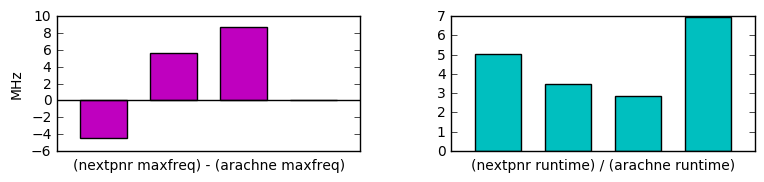

In [1]:
%matplotlib inline
import report
report.load("20180803-ice40-f9a9da6.dat")
report.print_summary()

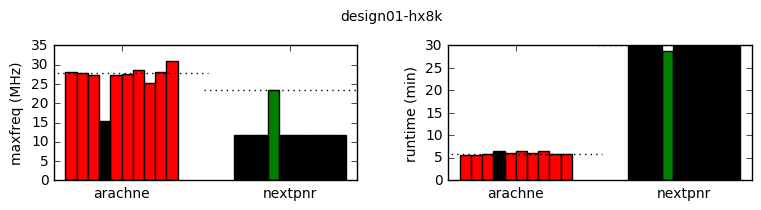

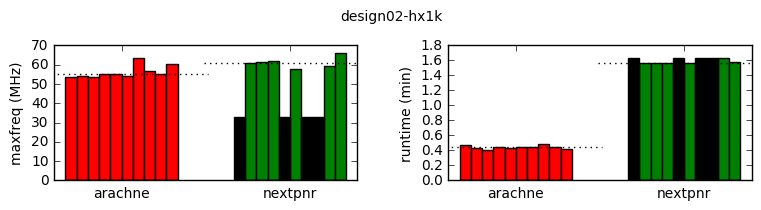

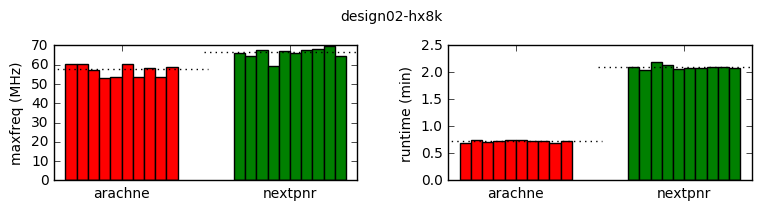

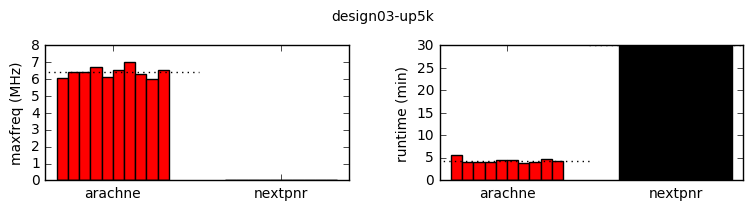

In [2]:
for d in report.designs:
    report.plot_cmp_tools(d)

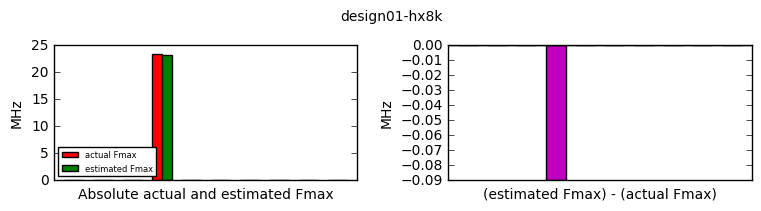

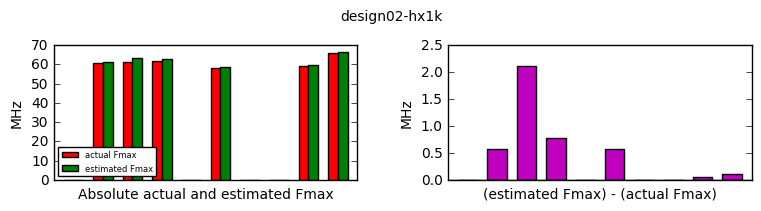

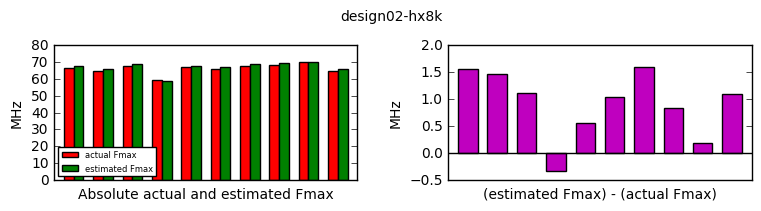

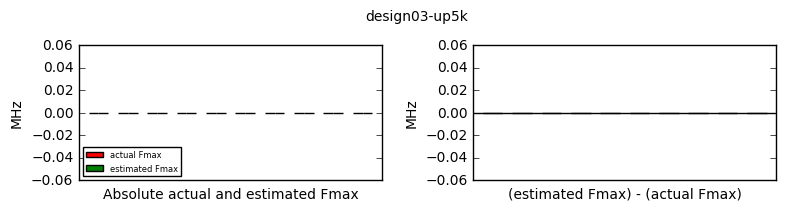

In [3]:
for d in report.designs:
    report.plot_est_maxfreq(d)

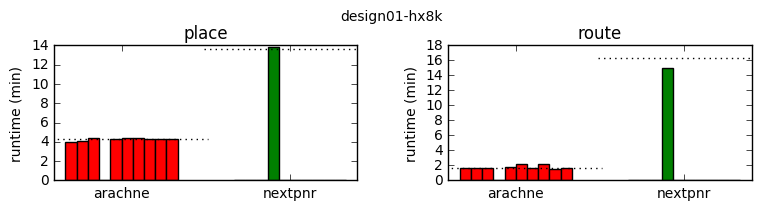

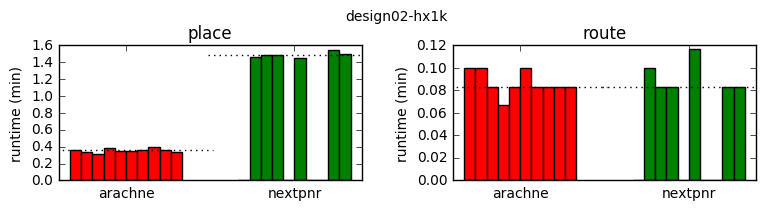

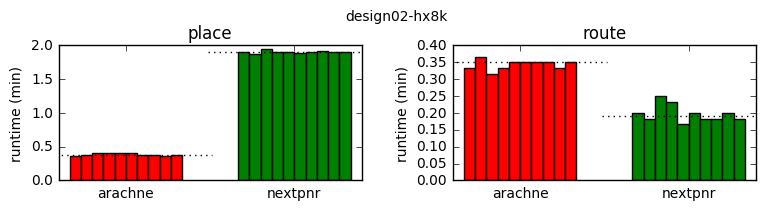

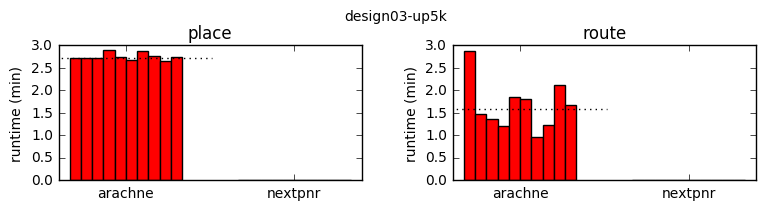

In [4]:
for d in report.designs:
    report.plot_place_route(d)